In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

In [ ]:
#Taking - Accenture Data
acn = yf.Ticker('ACN')
acn_data = acn.history()
acn_data.tail()

Open        High         Low       Close  \
Date                                                                        
2023-05-19 00:00:00-04:00  288.600006  291.350006  287.350006  289.910004   
2023-05-22 00:00:00-04:00  289.369995  291.769989  288.869995  290.950012   
2023-05-23 00:00:00-04:00  289.160004  291.040009  287.119995  288.100006   
2023-05-24 00:00:00-04:00  286.029999  288.290009  284.899994  286.820007   
2023-05-25 00:00:00-04:00  288.510010  293.149994  285.179993  291.760010   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-05-19 00:00:00-04:00  2213300        0.0           0.0  
2023-05-22 00:00:00-04:00  2044100        0.0           0.0  
2023-05-23 00:00:00-04:00  2219800        0.0           0.0  
2023-05-24 00:00:00-04:00  2815100        0.0           0.0  
2023-05-25 00:00:00-04:00  3689600        0.0           0.0

In [ ]:
start_time = pd.to_datetime('2015-01-01')
end_time = pd.to_datetime('2021-03-01')
stock = ['ACN']
data_acn = yf.download(stock, start = start_time, end = end_time)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_acn.reset_index(inplace=True)
data_acn

Date        Open        High         Low       Close   Adj Close  \
0    2015-01-02   89.669998   90.089996   88.430000   88.839996   77.119690   
1    2015-01-05   88.040001   88.320000   87.180000   87.339996   75.817566   
2    2015-01-06   87.500000   87.769997   86.010002   86.709999   75.270691   
3    2015-01-07   87.160004   88.750000   87.160004   88.529999   76.850578   
4    2015-01-08   89.000000   90.150002   88.839996   89.879997   78.022491   
...         ...         ...         ...         ...         ...         ...   
1544 2021-02-22  252.690002  254.169998  250.089996  252.630005  245.059525   
1545 2021-02-23  251.559998  257.929993  250.589996  256.190002  248.512848   
1546 2021-02-24  253.210007  260.470001  252.820007  259.269989  251.500519   
1547 2021-02-25  258.980011  259.109985  252.580002  253.779999  246.175049   
1548 2021-02-26  255.240005  255.850006  249.809998  250.899994  243.381348   

       Volume  
0     2021300  
1     3000000  
2     2867000  
3     2865500  
4     2802900  
...       ...  
1544  1476000  
1545  2191300  
1546  2476300  
1547  2157700  
1548  2712800  

[1549 rows x 7 columns]

In [ ]:
acn_close = data_acn.reset_index()['Close']
acn_open = data_acn.reset_index()['Open']
acn_high = data_acn.reset_index()['High']
acn_low = data_acn.reset_index()['Low']
acn_volume = data_acn.reset_index()['Volume']
acn_Dates = data_acn.reset_index()['Date']

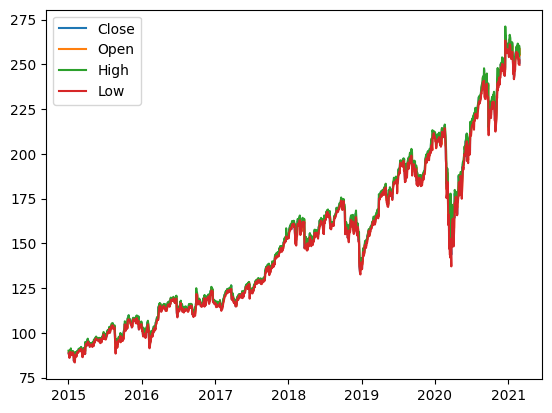

In [ ]:
# plotting stock price features graph
plt.plot(acn_Dates, acn_close)
plt.plot(acn_Dates, acn_open)
plt.plot(acn_Dates, acn_high)
plt.plot(acn_Dates, acn_low)
plt.legend(['Close','Open','High','Low'])

In [ ]:
# Scaling up the given data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
acn_close = scaler.fit_transform(np.array(acn_close).reshape(-1,1))
acn_open = scaler.fit_transform(np.array(acn_open).reshape(-1,1))
acn_high = scaler.fit_transform(np.array(acn_high).reshape(-1,1))
acn_low = scaler.fit_transform(np.array(acn_low).reshape(-1,1))
acn_volume = scaler.fit_transform(np.array(acn_volume).reshape(-1,1))

In [ ]:
Date01_acn= acn_Dates.to_numpy()
acn_date = Date01_acn.reshape(1549, 1)

In [ ]:
#splitting dataset into train, validation and test datasets of Accenture(Close)
training_size = int(len(acn_close)*0.65)
t_size = len(acn_close)-training_size
valid_size = int(t_size*0.7)
test_size = int(t_size-valid_size)
train_data_acn_close, valid_data_acn_close, test_data_acn_close = acn_close[0:training_size, :], acn_close[training_size:(training_size + valid_size), :], acn_close[(training_size + valid_size):len(acn_close), :]

In [ ]:
#splitting dataset into train, validation and test datasets of Accenture(Open)
training_size = int(len(acn_open)*0.65)
t_size = len(acn_open)-training_size
valid_size = int(t_size*0.7)
test_size = int(t_size-valid_size)
train_data_acn_open, valid_data_acn_open, test_data_acn_open = acn_open[0:training_size, :], acn_open[training_size:(training_size + valid_size), :], acn_open[(training_size + valid_size):len(acn_open), :]

In [ ]:
#splitting dataset into train, validation and test datasets of Accenture(High)
training_size = int(len(acn_high)*0.65)
t_size = len(acn_high)-training_size
valid_size = int(t_size*0.7)
test_size = int(t_size-valid_size)
train_data_acn_high, valid_data_acn_high, test_data_acn_high = acn_high[0:training_size, :], acn_high[training_size:(training_size + valid_size), :], acn_high[(training_size + valid_size):len(acn_high), :]

In [ ]:
#splitting dataset into train, validation and test datasets of Accenture(Low)
training_size = int(len(acn_low)*0.65)
t_size = len(acn_low)-training_size
valid_size = int(t_size*0.7)
test_size = int(t_size-valid_size)
train_data_acn_low, valid_data_acn_low, test_data_acn_low = acn_low[0:training_size, :], acn_low[training_size:(training_size + valid_size), :], acn_low[(training_size + valid_size):len(acn_low), :]

In [ ]:
training_size, valid_size, test_size

(1006, 380, 163)

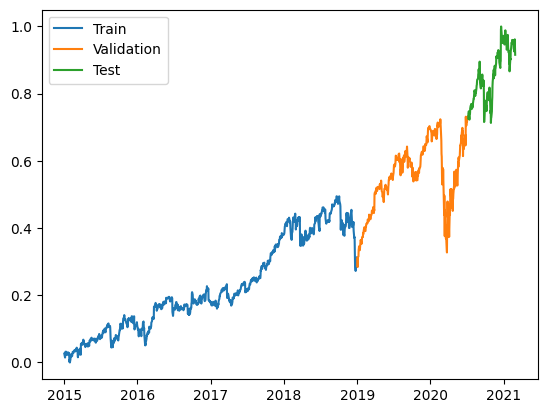

In [ ]:
plt.plot(acn_date[0:1006],train_data_acn_close)
plt.plot(acn_date[1006:1386],valid_data_acn_close)
plt.plot(acn_date[1386:1549], test_data_acn_close)
plt.legend(['Train','Validation','Test'])
#After Feature scaling the closing Price for Accenture

In [ ]:
# defining a function to add the required timesteps
def create_dataset(dataset, time_steps=1):
  dataX, dataY= [], []
  for i in range(len(dataset)-time_steps-1):
    a=dataset[i:(i+time_steps), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_steps, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
# taking timesteps and change it accordingly during fine-tuning
time_steps =100

In [ ]:
# fittting the train and test sets for Accenture (Close)
X_train_acn_close, y_train_acn_close = create_dataset(train_data_acn_close, time_steps)
X_valid_acn_close, y_valid_acn_close = create_dataset(valid_data_acn_close,time_steps)
X_test_acn_close, y_test_acn_close = create_dataset(test_data_acn_close, time_steps)
# reshaping inputs into 3 dimensions for Accenture
X_train_acn_close = X_train_acn_close.reshape(X_train_acn_close.shape[0], X_train_acn_close.shape[1],1)
X_valid_acn_close = X_valid_acn_close.reshape(X_valid_acn_close.shape[0], X_valid_acn_close.shape[1],1)
X_test_acn_close = X_test_acn_close.reshape(X_test_acn_close.shape[0], X_test_acn_close.shape[1],1)

In [ ]:
# fittting the train and test sets for Accenture (Open)
X_train_acn_open, y_train_acn_open = create_dataset(train_data_acn_open, time_steps)
X_valid_acn_open, y_valid_acn_open = create_dataset(valid_data_acn_open, time_steps)
X_test_acn_open, y_test_acn_open = create_dataset(test_data_acn_open, time_steps)
# reshaping inputs into 3 dimensions for Accenture
X_train_acn_open = X_train_acn_open.reshape(X_train_acn_open.shape[0], X_train_acn_open.shape[1],1)
X_valid_acn_open = X_valid_acn_open.reshape(X_valid_acn_open.shape[0], X_valid_acn_open.shape[1],1)
X_test_acn_open = X_test_acn_open.reshape(X_test_acn_open.shape[0], X_test_acn_open.shape[1],1)

In [ ]:
# Creating stacked LSTM model
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
# Hyperparameter Tuning must be done to improve the model Neural Network
# Considering the model NN as : 
model2 = Sequential()
model2.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(100,1)))
model2.add(Dropout(0.2))
model2.add(LSTM(60, activation = 'relu',return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(80, activation = 'relu',return_sequences=True))
model2.add(Dropout(0.4))
model2.add(LSTM(units=120), activation = 'relu')
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           30200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
# Fitting data for Accenture Inc
history_acn = model2.fit(X_train_acn_close, y_train_acn_close, validation_data=(X_valid_acn_close, y_valid_acn_close),epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 [==============================] - 10s 307ms/step - loss: 0.0170 - val_loss: 0.0361
Epoch 2/100
15/15 [==============================] - 3s 210ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 3/100
15/15 [==============================] - 3s 213ms/step - loss: 0.0018 - val_loss: 0.0045
Epoch 4/100
15/15 [==============================] - 4s 256ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 5/100
15/15 [==============================] - 3s 213ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 6/100
15/15 [==============================] - 3s 211ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 7/100
15/15 [==============================] - 4s 266ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 8/100
15/15 [==============================] - 3s 213ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 9/100
15/15 [==============================] - 3s 214ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 10/100
15/15 [==============================] - 3s 215ms/step - loss: 0.0012 - val_l

In [ ]:
model2.save('keras_model.h5')

In [ ]:
# Accenture
train_predict_acn_close=model2.predict(X_train_acn_close)
valid_predict_acn_close=model2.predict(X_valid_acn_close)
test_predict_acn_close=model2.predict(X_test_acn_close)

2/2 [==============================] - 0s 44ms/step


In [ ]:
# ReverseScaling to original form for ACCENTURE
train_predict_acn_close=scaler.inverse_transform(train_predict_acn_close)
valid_predict_acn_close=scaler.inverse_transform(valid_predict_acn_close)
test_predict_acn_close=scaler.inverse_transform(test_predict_acn_close)

29/29 [==============================] - 1s 38ms/step


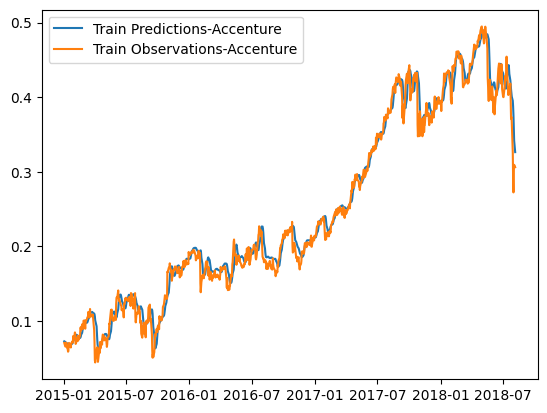

In [ ]:
# Checking the train set of data with the predicted values for the train set for ACCENTURE
train_predict_acn=model2.predict(X_train_acn_close).flatten()

plt.plot(acn_date[0:905], train_predict_acn)
plt.plot(acn_date[0:905], y_train_acn_close)
plt.legend(['Train Predictions-Accenture', 'Train Observations-Accenture' ])

9/9 [==============================] - 0s 45ms/step


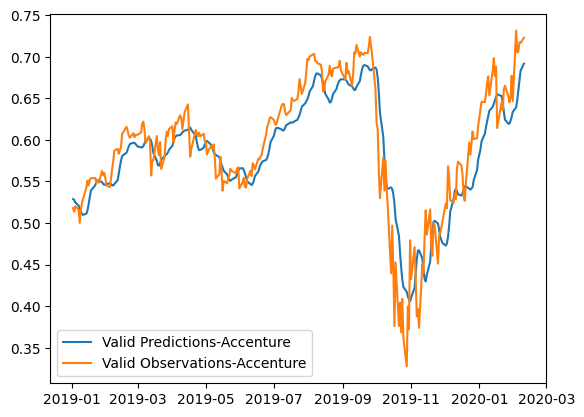

In [ ]:
# Checking the valid set of data with the predicted values for the valid set for ACCENTURE
valid_predict_acn=model2.predict(X_valid_acn_close).flatten()

plt.plot(acn_date[1006:1285], valid_predict_acn)
plt.plot(acn_date[1006:1285], y_valid_acn_close)
plt.legend(['Valid Predictions-Accenture', 'Valid Observations-Accenture' ])

As, we can see the model works quite fine with the train and valid data predictions, now we will predict the test data and evaluate profit and loss based on that.

In [ ]:
len(y_test_acn_close)

62

In [ ]:
y_test_acn_close

array([0.90714522, 0.9114806 , 0.9058281 , 0.92327958, 0.90895623,
       0.91043789, 0.92970038, 0.90698059, 0.91005379, 0.89309628,
       0.88974868, 0.88793767, 0.87652289, 0.89463288, 0.89682799,
       0.99023159, 1.        , 0.97349365, 0.96279224, 0.95165186,
       0.95088348, 0.96394464, 0.95340802, 0.95220068, 0.97234108,
       0.94627369, 0.9542861 , 0.96976177, 0.98326206, 0.98853037,
       0.96762159, 0.95692017, 0.94967614, 0.93826144, 0.93085278,
       0.94287123, 0.97486562, 0.9543958 , 0.93699926, 0.92201731,
       0.92723085, 0.88941942, 0.90720007, 0.86648007, 0.8974866 ,
       0.90396224, 0.90187683, 0.92734055, 0.93024911, 0.95093841,
       0.9529689 , 0.94890793, 0.9600483 , 0.95181649, 0.94951151,
       0.95900559, 0.95269457, 0.93436502, 0.92525521, 0.94479202,
       0.96169459, 0.93156623])

In [ ]:
y_test_acn_close= y_test_acn_close.reshape(62,1)
y_test_acn_close=scaler.inverse_transform(y_test_acn_close)

In [ ]:
y_test_acn_close= y_test_acn_close.flatten()
test_predict_acn_close=test_predict_acn_close.flatten()

In [ ]:
## converting into list
y_test_acn_close_L=y_test_acn_close.tolist()
test_predict_acn_close_L=test_predict_acn_close.tolist()

In [ ]:
# rounding off the values upto 2 decimal places
L_test_new=[]
for i in range(len(y_test_acn_close_L)):
  L_test_new.append(round(y_test_acn_close_L[i], 2))
L_pred_new=[]
for i in range(len(test_predict_acn_close_L)):
  L_pred_new.append(round(test_predict_acn_close_L[i], 2))

In [ ]:
## applying the Profit-signal algorithm
pnl_signal=[]
for i in range(len(L_pred_new)-1):
  x1 = L_pred_new[i+1] - L_test_new[i]
  x2 = L_test_new[i+1] - L_test_new[i]
  x3 = L_test_new[i]
  P = ((x1 * x2)/x3)
  pnl = np.sign(P)
  if pnl == 1.0 or pnl==1.00:
    print(f"The signal is to : BUY :{pnl}")
  else :
    print(f"The signal is to : SELL :{pnl}")
  pnl_signal.append(pnl)

The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to :

In [ ]:
## printing out the BUy or sell streak based in Profit Signal
print(f"The pnl signal for the test data is as : {pnl_signal}")

The pnl signal for the test data is as : [-1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0]


In [ ]:
y_test_acn_open = y_test_acn_open.reshape(62,1)
y_test_acn_open = scaler.inverse_transform(y_test_acn_open )

In [ ]:
# converting both to lists
y_test_acn_close= y_test_acn_close.flatten()
y_test_acn_close_L=y_test_acn_close.tolist()
y_test_acn_open= y_test_acn_open.flatten()
y_test_acn_open_L=y_test_acn_open.tolist()

In [ ]:
#rounding off y_test_acn_close and y_test_acn_open upto 2 dec places
# rounding off the values upto 2 decimal places
L_test_close_new=[]
for i in range(len(y_test_acn_close_L)):
  L_test_close_new.append(round(y_test_acn_close_L[i], 2))
L_test_open_new=[]
for i in range(len(y_test_acn_open_L)):
  L_test_open_new.append(round(y_test_acn_open_L[i], 2))

In [ ]:
# profit calculation
profit_calc=[]
for i in range(len(pnl_signal)):
  y1 = L_test_close_new[i] - L_test_open_new[i]
  y2 = pnl_signal[i]
  profit = y2 * y1
  if pnl_signal[i] == 1.0 :
    print(f"The signal is : BUY :{pnl}, since profit :{profit}")
  elif pnl_signal[i] == -1.0:
    print(f"The signal is : SELL :{pnl}, since loss :{profit}")
  profit_calc.append(profit)

The signal is : SELL :1.0, since loss :-5.2862046472240274e+20
The signal is : BUY :1.0, since profit :5.309786435980701e+20
The signal is : SELL :1.0, since loss :-5.279040334641144e+20
The signal is : BUY :1.0, since profit :5.373965540556086e+20
The signal is : SELL :1.0, since loss :-5.296055406218881e+20
The signal is : SELL :1.0, since loss :-5.3041147454547886e+20
The signal is : BUY :1.0, since profit :5.408890710364586e+20
The signal is : SELL :1.0, since loss :-5.2853091650867056e+20
The signal is : BUY :1.0, since profit :5.302025438962469e+20
The signal is : BUY :1.0, since profit :5.2097871349437956e+20
The signal is : BUY :1.0, since profit :5.1915782390110624e+20
The signal is : BUY :1.0, since profit :5.181727480016208e+20
The signal is : SELL :1.0, since loss :-5.1196381374174416e+20
The signal is : SELL :1.0, since loss :-5.218145271881676e+20
The signal is : SELL :1.0, since loss :-5.230085337368852e+20
The signal is : SELL :1.0, since loss :-5.738143003726488e+20
Th

In [ ]:
zero_L=[]
for i in range(61):
  zero_L.append(0)

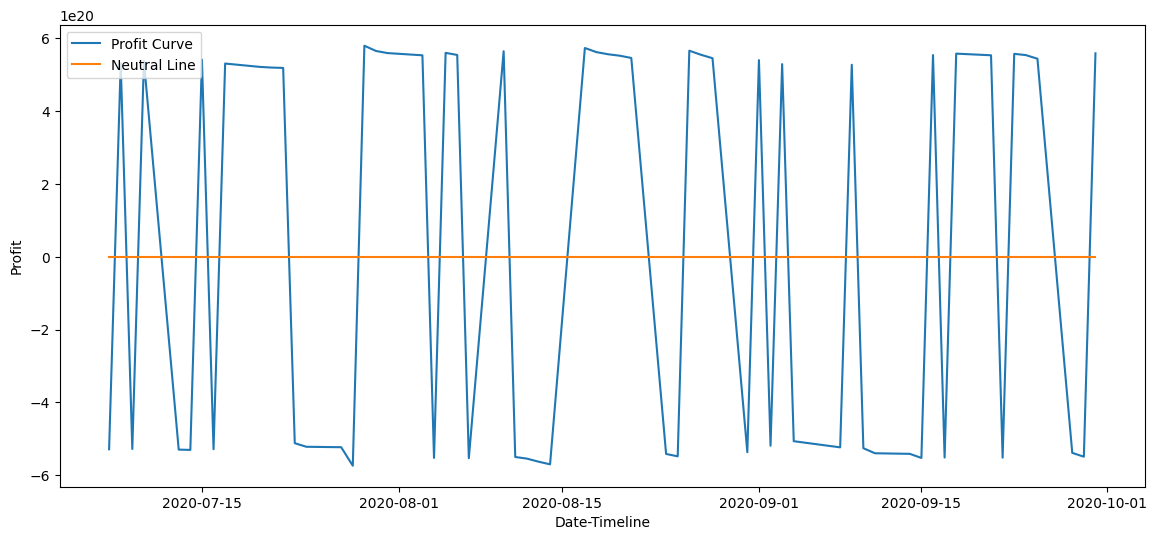

In [ ]:
# plotting the profit curve
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.xlabel('Date-Timeline')
plt.ylabel('Profit')
plt.plot(acn_date[1386:1447], profit_calc) 
plt.plot(acn_date[1386:1447], zero_L)
plt.legend(["Profit Curve","Neutral Line"])